In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
read = 734920
seq = 311118000
seq_10k = 3.11501e+06 
write = 846320 

def get_df(path, small=False):
    df = pd.read_csv(path, index_col=0)
    df["speedup"] = seq / df.iloc[:, 0]
    if (small):
        df["speedup"] = seq_10k / df.iloc[:, 0]

    df["scalability"] = df.iloc[0, 0] / df.iloc[:, 0]
    df["efficiency"] = df["speedup"] / df.index
    return df


In [3]:
par = get_df("time_par")
ff_pf = get_df("time_ff_pf")
ff_mw = get_df("time_ff_mw")

par_10k = get_df("time_par_10k", True)
ff_pf_10k = get_df("time_ff_pf_10k", True)
ff_mw_10k = get_df("time_ff_mw_10k", True)

In [5]:
ff_mw["speedup"].max()

65.15805831424012

Text(0, 0.5, 'Scalability')

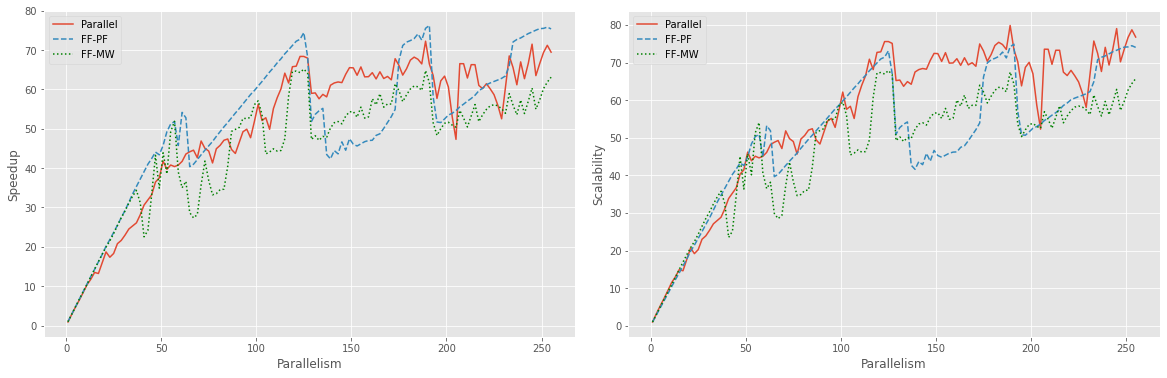

In [157]:
# plotting
fig = plt.figure(figsize=(20, 6)) 
fig_dims = (1, 2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot2grid(fig_dims, (0, 0))
par["speedup"].plot(style='-')
ff_pf["speedup"].plot(style='--')
ff_mw["speedup"].plot(style=':', color='green')
plt.legend(["Parallel", "FF-PF", "FF-MW"])
plt.xlabel("Parallelism")
plt.ylabel("Speedup")

plt.subplot2grid(fig_dims, (0, 1))
par["scalability"].plot(style='-')
ff_pf["scalability"].plot(style='--')
ff_mw["scalability"].plot(style=':', color='green')
plt.legend(["Parallel", "FF-PF", "FF-MW"])
plt.xlabel("Parallelism")
plt.ylabel("Scalability")

Text(0, 0.5, 'Efficiency')

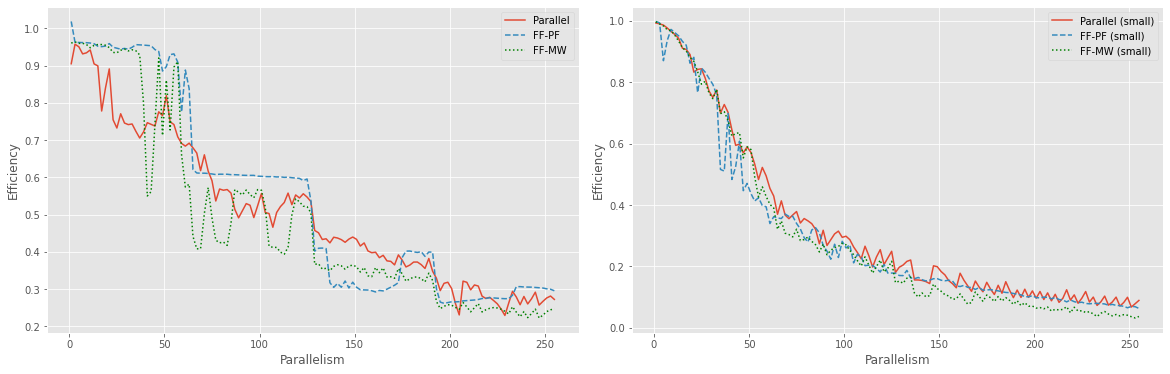

In [158]:
# plotting
fig = plt.figure(figsize=(20, 6)) 
fig_dims = (1, 2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot2grid(fig_dims, (0, 0))
par["efficiency"].plot(style='-')
ff_pf["efficiency"].plot(style='--')
ff_mw["efficiency"].plot(style=':', color='green')
plt.legend(["Parallel", "FF-PF", "FF-MW"])
plt.xlabel("Parallelism")
plt.ylabel("Efficiency")

plt.subplot2grid(fig_dims, (0, 1))
par_10k["efficiency"].plot(style='-')
ff_pf_10k["efficiency"].plot(style='--')
ff_mw_10k["efficiency"].plot(style=':', color='green')
plt.legend(["Parallel (small)", "FF-PF (small)", "FF-MW (small)"])
plt.xlabel("Parallelism")
plt.ylabel("Efficiency")